# B6. Confidence intervals for normal means

> When it is reasonable to assume that the data are sampled from a normal distribution, then exact confidence intervals, known as $t$-intervals, may be
used.
>
> In Computer activity 21, you will see how to use Minitab to obtain a $t$-interval for a normal mean.

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from util.confidenceinterval import get_two_sample_t_interval

## Computer activy 21

> The Minitab worksheet schoolgirls.mwx contains the heights (in cm) and weights (in kg)of 30 eleven-year-old schoolgirls from Bradford.

In [2]:
df_schoolgirls = pd.read_csv("data/schoolgirls.csv")

In [3]:
df_schoolgirls.head()

,Height,Weight
0,135,26
1,146,33
2,153,55
3,154,50
4,139,32


In [4]:
df_schoolgirls.describe()

,Height,Weight
count,30.000000,30.000000
mean,144.866667,36.166667
std,7.614566,7.697215
min,131.000000,25.000000
25%,139.250000,31.250000
50%,146.000000,34.000000
75%,149.000000,40.750000
max,164.000000,55.000000


### (a)

> Obtain a normal probability plot for the variable Height.
> Verify that the variation in height is adequately modelled by a normal distribution.

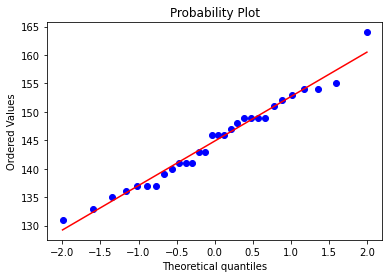

In [5]:
# See B2_NormalProbabilityPlots
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(df_schoolgirls["Height"], plot=ax)
plt.show()

The points lie reasonably close to a straight line, so the normality assumption appears reasonable.

### (b)

> Obtain a 90% $t-$interval for the mean height of eleven-year-old schoolgirls in Bradford

Let us identify the following parameters

- $\overline x$, the sample mean
- $s^{2}/n$, the standard error
- $df$, the degrees of freedom ($n$ - 1)
- $t$, the $t$-statistic

In [6]:
x = df_schoolgirls["Height"].mean()

In [7]:
ste = df_schoolgirls["Height"].std(ddof=1)/sqrt(df_schoolgirls["Height"].size)

In [8]:
df = df_schoolgirls["Height"].size - 1

We can now obtain the 90% $t-$interval,

In [9]:
stats.t(df=df, loc=x, scale=ste).interval(alpha=0.9)

(142.50450100087164, 147.2288323324617)

## Computer activy 22

> The origins of the Etruscan civilisation that dominated parts of Italy in the middle centuries of the first millennium bce remain something of a mystery.
> One question is whether Etruscans were natives of Italy, or immigrants from elsewhere.
In an anthropometric study, observations on the maximum head breadth (measured in mm) were taken on 84 skulls of Etruscan males and on 70 skulls of modern Italian males (presumed to be similar to those of native Italian males of the Etruscan period).
> These data may be used to compare the mean head breadths of Etruscan males and modern Italian males.

In [10]:
df_skulls = pd.read_csv("data/skulls.csv")

### (a)

> Calculate the difference between the mean skull breadth of Etruscans and that of Italians.
> Calculate the sample standard deviations for the two variables.
> Check for equality of variance using the rule of thumb.

The difference between the means (Etruscans − Italians) is

In [11]:
df_skulls["Etruscans"].mean() - df_skulls["Italians"].mean()

11.330952380952368

The sample standard deviation for the Etruscan skulls is 

In [12]:
df_skulls["Etruscans"].std(ddof=1)

5.970512259260548

and for the Italian skulls is

In [13]:
df_skulls["Italians"].std(ddof=1)

5.749948239932666

The ratio of the larger sample variance to the smaller is.

In [14]:
df_skulls["Etruscans"].std(ddof=1)/df_skulls["Italians"].std(ddof=1)

1.0383593051840176

Since this is less than 3, you can assume that the underlying variances are equal.

### (b)

> Check whether the assumption of normality is reasonable for the two variables using normal probability plots.

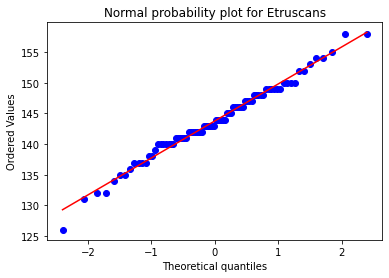

In [15]:
# See B2_NormalProbabilityPlots
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(df_skulls["Etruscans"], plot=ax, fit=True)
ax.set(title="Normal probability plot for Etruscans")
plt.show()

Note that we use `dropna()` for Etruscans, as otherwise the regression line does not appear.

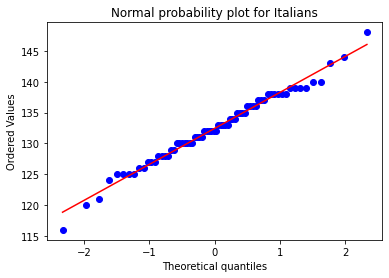

In [16]:
# See B2_NormalProbabilityPlots
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(df_skulls["Italians"].dropna(), plot=ax, fit=True)
ax.set(title="Normal probability plot for Italians")
plt.show()

The plots suggest that the normality assumption is reasonable for both populations.

### (c)

> Now construct a 95% t-interval for the difference between the mean skull breadth of Etruscans and that of Italians, assuming equal variances.

A 95% two-sample t-interval for the difference in mm between the mean skull breadth of Etruscans and that of modern Italians, calculated assuming equal variances, is

In [17]:
get_two_sample_t_interval(alpha=0.95,
                          a=df_skulls["Etruscans"],
                          b=df_skulls["Italians"])

(9.453650451007142, 13.208254310897594)